In [1]:
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import gmaps
import os
import json
import time

#Import API Key
from api_keys import g_key

In [2]:
#the set the path
csv_path = "../Resources/country_vaccinations_clean.csv"

# Read our COVID data into pandas
covid_df = pd.read_csv(csv_path)
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Albania,ALB,1/10/2021,0,0,0,0,0,0,0,0,0,Pfizer/BioNTech,Ministry of Health
1,Albania,ALB,1/11/2021,0,0,0,0,64,0,0,0,22,Pfizer/BioNTech,Ministry of Health
2,Albania,ALB,1/12/2021,128,128,0,0,64,0,0,0,22,Pfizer/BioNTech,Ministry of Health
3,Albania,ALB,1/13/2021,188,188,0,60,63,0,0,0,22,Pfizer/BioNTech,Ministry of Health
4,Albania,ALB,1/14/2021,266,266,0,78,66,0,0,0,23,Pfizer/BioNTech,Ministry of Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Wales,0,2/6/2021,592228,589622,2606,32760,26854,18,18,0,8517,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2912,Wales,0,2/7/2021,606768,603976,2792,14540,27089,19,19,0,8592,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2913,Wales,0,2/8/2021,632251,628760,3491,25483,27364,20,19,0,8679,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2914,Wales,0,2/9/2021,659106,655419,3687,26855,27921,20,20,0,8856,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom


## Store Cleaned Data in DataFrame   

In [3]:
#Q1:  Total number of people fully vaccinated by country and ratios-daily  
#DF:  Country, Code, Date, People Fully Vaccinated, People Fully Vac/Hundred, add vaccine and source name
#Dict: Total number of people fully vaccinated - this is the number of people that received the entire set of immunization 
#according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
#Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
#Show covid_count() as part of understanding the data structure.  Show count and describe.
#Graph Type:  Bar Chart

#Check the number of countries 
country_count=covid_df["country"].value_counts()
country_count


Wales               60
Northern Ireland    60
England             60
Scotland            60
United Kingdom      60
                    ..
Iran                 2
Algeria              2
Saint Helena         1
Liechtenstein        1
Greenland            1
Name: country, Length: 85, dtype: int64

In [4]:
#List the sum of "people_fully_vaccinated" grouped by country
country_sum=covid_df.groupby(["country"]).sum()["people_fully_vaccinated"]
country_sum

country
Albania                       439
Algeria                         0
Andorra                         0
Argentina                 1912283
Austria                    703280
                          ...    
Turkey                          0
United Arab Emirates       250000
United Kingdom           15206782
United States           140464500
Wales                       32642
Name: people_fully_vaccinated, Length: 85, dtype: int64

In [5]:
#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries=covid_df[["country","people_fully_vaccinated"]].copy()
filtered_countries=filtered_countries[filtered_countries["people_fully_vaccinated"] !=0]

filtered_no_zero=filtered_countries.groupby(["country"]).sum()["people_fully_vaccinated"]
filtered_no_zero_df=pd.DataFrame(filtered_no_zero)
filtered_no_zero_df
fil_no_zero_df_sort=filtered_no_zero_df.sort_values("people_fully_vaccinated")
fil_no_zero_df_sort

,people_fully_vaccinated
country,
Albania,439
Guernsey,522
Faeroe Islands,2513
Bermuda,3191
Jersey,9360
Singapore,12100
Cayman Islands,13141
Cyprus,17632
Seychelles,22606


Text(0, 0.5, 'No. of People Fully Vaccinated')

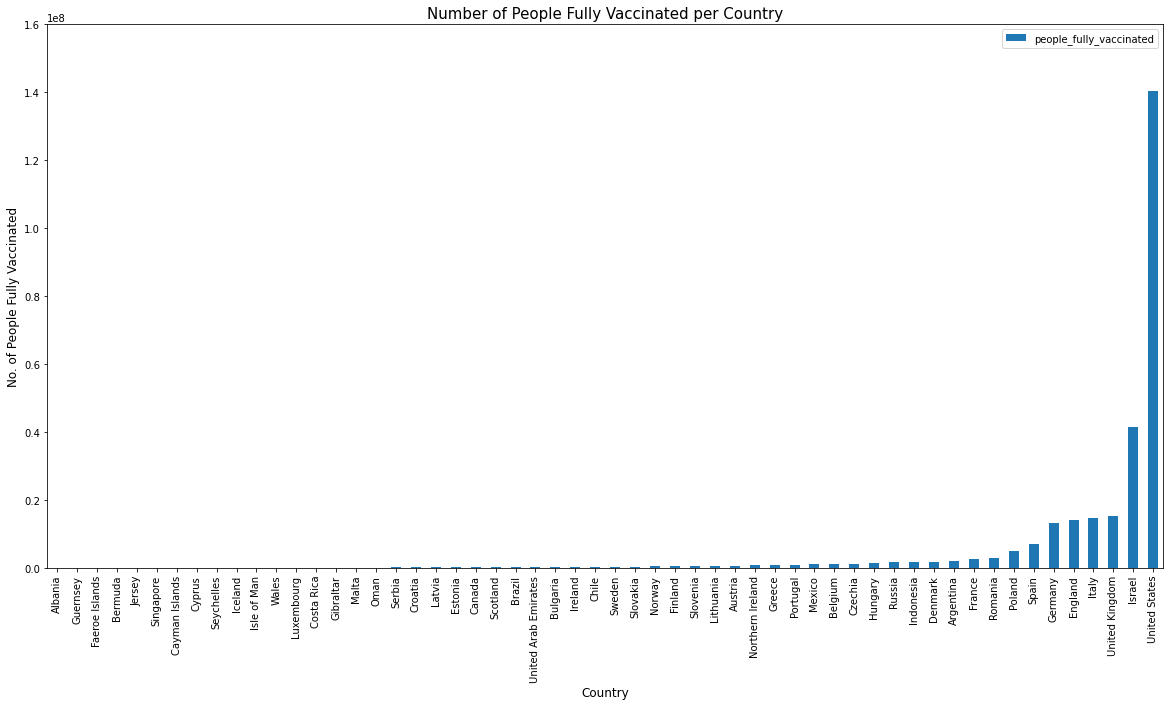

In [12]:
#Plot filtered DataFrame (sorted) into bar graph of people fully vaccinated (sum) grouped by country
fil_no_zero_df_sort.plot.bar(figsize=(20,10))
plt.title("Number of People Fully Vaccinated per Country", fontsize=15)
plt.ylim(0,160000000)
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. of People Fully Vaccinated", fontsize=12)

In [7]:
#Create new DF that only contains country and people_fully_vaccinated_per_hundred columns and removes 0 from people_fully_vaccinated_per_hundred
filtered_countries_hun=covid_df[["country","people_fully_vaccinated_per_hundred"]].copy()
filtered_countries_hun=filtered_countries_hun[filtered_countries_hun["people_fully_vaccinated_per_hundred"] !=0]

filtered_no_zero_hun=filtered_countries_hun.groupby(["country"])["people_fully_vaccinated_per_hundred"].max()
filtered_no_zero__hun_df=pd.DataFrame(filtered_no_zero_hun)
filtered_no_zero__hun_df

fil_no_zero_df_sort_hun=filtered_no_zero__hun_df.sort_values("people_fully_vaccinated_per_hundred")
fil_no_zero_df_sort_hun

,people_fully_vaccinated_per_hundred
country,
Austria,1
Romania,1
Portugal,1
Poland,1
Norway,1
Northern Ireland,1
Lithuania,1
Slovakia,1
Ireland,1


Text(0, 0.5, 'No. of People Fully Vaccinated per Hundred')

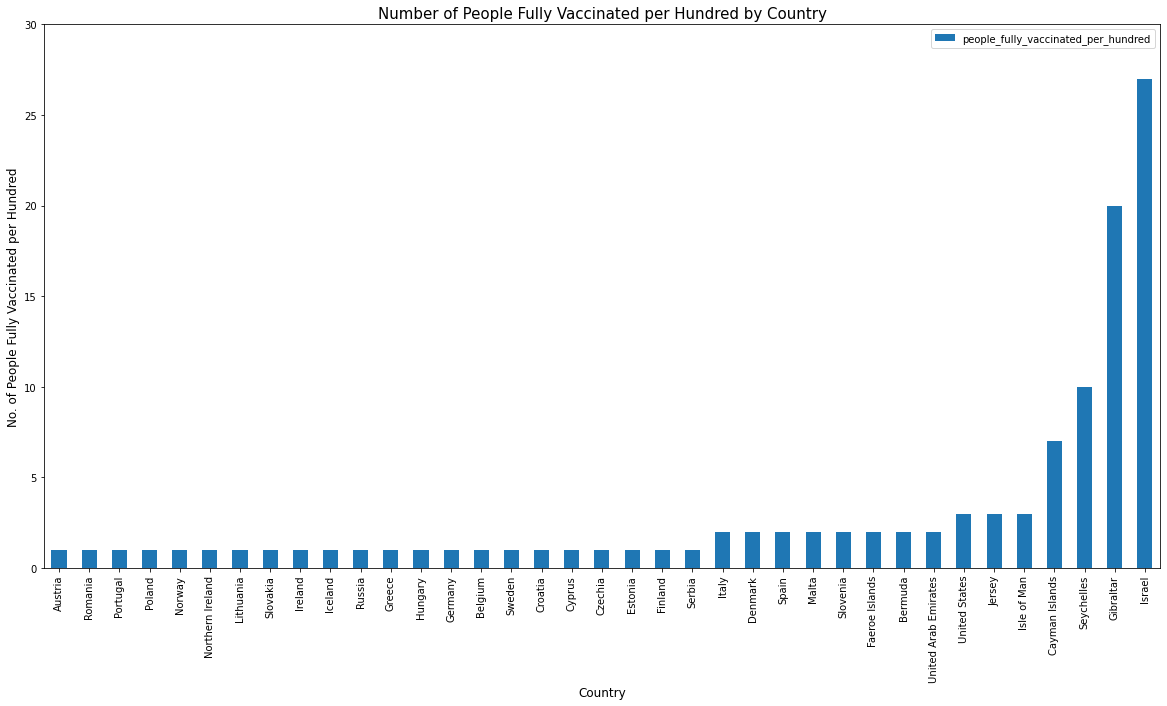

In [8]:
#Plot filtered DataFrame (sorted) into bar graph of people fully vaccinated per hundred (sum) grouped by country
fil_no_zero_df_sort_hun.plot.bar(figsize=(20,10))
plt.title("Number of People Fully Vaccinated per Hundred by Country", fontsize=15)
plt.ylim(0,30)
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. of People Fully Vaccinated per Hundred", fontsize=12)

In [26]:
#Q2: Which vaccines and mixes are being distributed most /least. 
#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries_vac=covid_df[["country","people_fully_vaccinated","vaccines"]].copy()
filtered_countries_vac=filtered_countries_vac[filtered_countries_vac["people_fully_vaccinated"] !=0]

filtered_no_zero_dist=filtered_countries_vac.groupby(["vaccines"])["people_fully_vaccinated"].sum()
filtered_no_zero_dist_df=pd.DataFrame(filtered_no_zero_dist)
filtered_no_zero_dist_df

fil_no_zero_dist_sort=filtered_no_zero_dist_df.sort_values("people_fully_vaccinated")
fil_no_zero_dist_sort

,people_fully_vaccinated
vaccines,
"Oxford/AstraZeneca, Sinopharm/Beijing",22606
"Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",130927
"Oxford/AstraZeneca, Sinovac",212358
"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V",250000
"Pfizer/BioNTech, Sinovac",380920
Sinovac,1730334
Pfizer/BioNTech,3300778
Sputnik V,3612283
"Oxford/AstraZeneca, Pfizer/BioNTech",31565542


Text(0, 0.5, 'Sum of Vaccine')

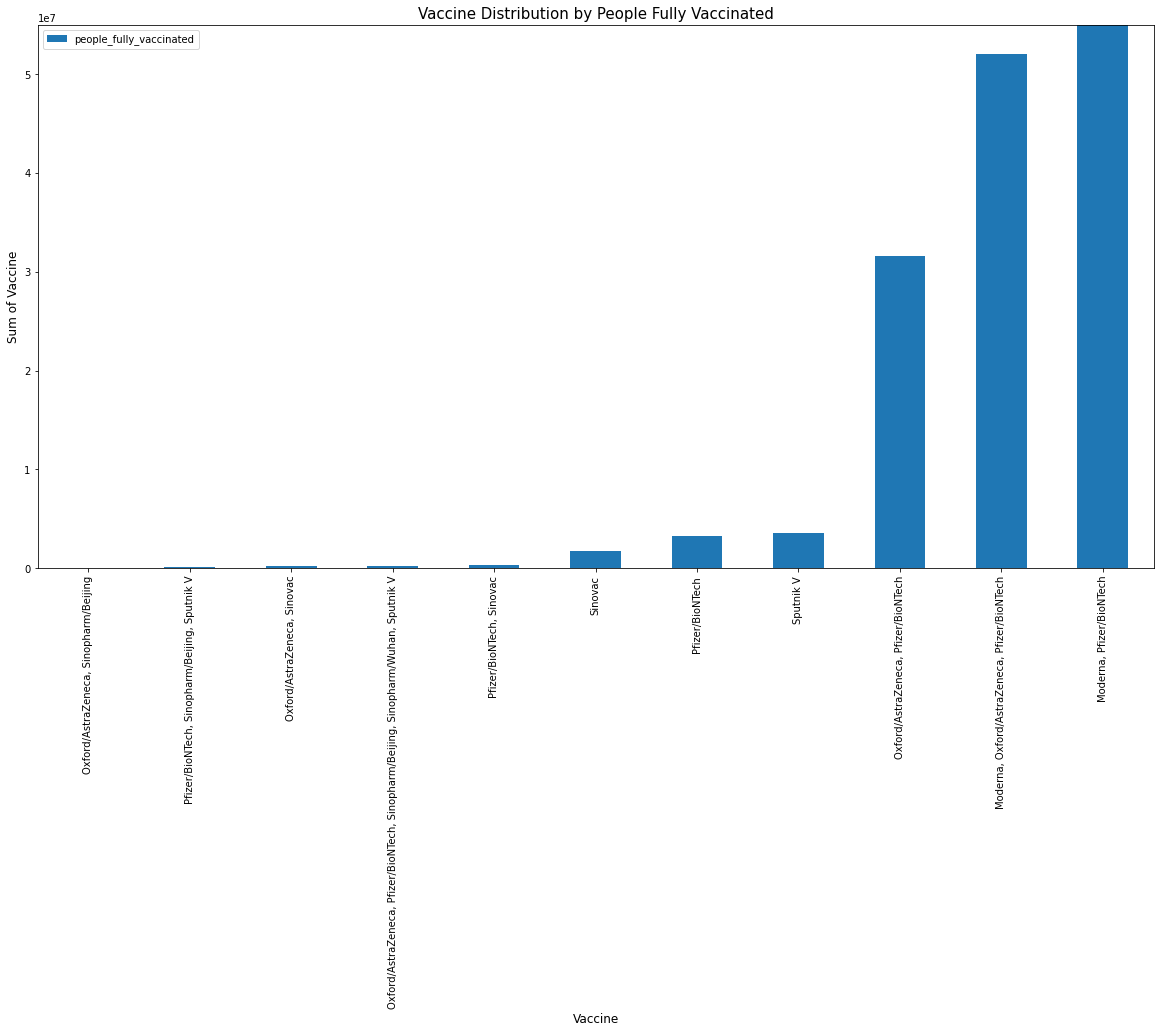

In [28]:
#Graph the results
fil_no_zero_dist_sort.plot.bar(figsize=(20,10))
plt.title("Vaccine Distribution by People Fully Vaccinated", fontsize=15)
plt.ylim(0,55000000)
plt.xlabel("Vaccine", fontsize=12)
plt.ylabel("Sum of Vaccine", fontsize=12)

In [11]:
#Q3:  Northern vs Southern Hemisphere-Identify global patterns or observations in regards to the vaccination types.
#DF
#Create Heat Map